In [307]:
from Bio.Blast import NCBIXML
from os import listdir
import pandas as pd

def edit_xmltype(path):
    edit = open(path).read().replace("BlastOutput2","BlastXML2")
    open(path,"w").write(edit)

def find_mutations(hsp):
    hsp_mutations = []
    start = hsp.sbjct_start
    for i, (q, s) in enumerate(zip(hsp.query,hsp.sbjct)):
        if q != s:
            hsp_mutations.append([q,start+i,s])
    return hsp_mutations

pct_identities = []
df = pd.DataFrame(columns=["file","protein","mutations"])
files = listdir("./BLAST_OUT/XML/")[1:]
for i,xml_filename in enumerate(files):
    mutations[xml_filename] = {}
    print(f"Progress: {100*i/len(files):.2f}%",end="\r")
    path_fmt = f"./BLAST_OUT/XML/{xml_filename}"
    edit_xmltype(path_fmt)
    record = NCBIXML.read(open(path_fmt))
    for description,alignment in zip(record.descriptions,record.alignments):
        record_mutations = []
        for hsp in alignment.hsps:
            pct_identity = hsp.identities/hsp.align_length
            pct_identities.append(pct_identity)
            if pct_identity >= 0.95 and pct_identity < 1:
                record_mutations.extend(find_mutations(hsp))
        df.loc[len(df),:] = [xml_filename,description.title,record_mutations]
df["n_mutations"] = df.mutations.apply(lambda x: len(x))

C:\Users\Ryan\Anaconda3\lib\site-packages\pandas\core\internals\blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)


In [308]:
df.sort_values(by="n_mutations",ascending=False)

,file,protein,mutations,n_mutations
672,BLAST_89.xml,cds-YP_009724397.2; gene-GU280_gp10; Genbank:Y...,"[[g, 175, G], [s, 176, S], [r, 177, R], [g, 17...",87
429,BLAST_4.xml,cds-YP_009724397.2; gene-GU280_gp10; Genbank:Y...,"[[g, 175, G], [s, 176, S], [r, 177, R], [g, 17...",83
384,BLAST_29.xml,cds-YP_009724397.2; gene-GU280_gp10; Genbank:Y...,"[[g, 175, G], [s, 176, S], [r, 177, R], [g, 17...",83
301,BLAST_184.xml,cds-YP_009724397.2; gene-GU280_gp10; Genbank:Y...,"[[g, 175, G], [s, 176, S], [r, 177, R], [g, 17...",74
135,BLAST_134.xml,cds-YP_009724397.2; gene-GU280_gp10; Genbank:Y...,"[[g, 175, G], [s, 176, S], [r, 177, R], [g, 17...",64
...,...,...,...,...
255,BLAST_17.xml,cds-YP_009724389.1; gene-GU280_gp01; Genbank:Y...,[],0
256,BLAST_17.xml,cds-YP_009724390.1; gene-GU280_gp02; Genbank:Y...,[],0
258,BLAST_170.xml,cds-YP_009725295.1; gene-GU280_gp01; Genbank:Y...,[],0
259,BLAST_170.xml,cds-YP_009724389.1; gene-GU280_gp01; Genbank:Y...,[],0


In [329]:
from itertools import chain
protein_df = pd.DataFrame(df.groupby("protein").n_mutations.sum()).sort_values(by="n_mutations",ascending=False)
protein_df["mutations"] = None
for i,protein in enumerate(protein_df.index):
    protein_mutations = []
    protein_rows = df.loc[df.protein == protein,"mutations"]
    for row in protein_rows:
        protein_mutations.extend(row)
    protein_mutations = ["".join([str(i) for i in protein_mutation]) for protein_mutation in protein_mutations]
    protein_mutations = list(set(protein_mutations))
    protein_df.loc[protein,:] = [protein_df.loc[protein,"n_mutations"],protein_mutations]
protein_df["n_unique_mutations"] = protein_df.mutations.apply(lambda x: len(x))
protein_df["shorthand"] = [i.split(";")[-2] for i in protein_df.index]
protein_df

C:\Users\Ryan\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


,n_mutations,mutations,n_unique_mutations,shorthand
protein,,,,
cds-YP_009724390.1; gene-GU280_gp02; Genbank:YP_009724390.1; YP_009724390.1; structural protein; spike protein; CDS; S; GU280_gp02; surface glycoprotein; YP_009724390.1,1585,"[N835K, P787Q, I721S, S204Y, W488C, K509R, G90...",254,surface glycoprotein
cds-YP_009724397.2; gene-GU280_gp10; Genbank:YP_009724397.2; YP_009724397.2; ORF9; structural protein; CDS; N; GU280_gp10; nucleocapsid phosphoprotein; YP_009724397.2,391,"[s193S, t205T, k237K, k248K, f363F, s194S, t36...",94,nucleocapsid phosphoprotein
cds-YP_009724396.1; gene-GU280_gp09; Genbank:YP_009724396.1; YP_009724396.1; CDS; ORF8; GU280_gp09; ORF8 protein; YP_009724396.1,9,[S84L],1,ORF8 protein
cds-YP_009724389.1; gene-GU280_gp01; Genbank:YP_009724389.1; YP_009724389.1; pp1ab; translated by -1 ribosomal frameshift; ribosomal slippage; CDS; ORF1ab; GU280_gp01; ORF1ab polyprotein; YP_009724389.1,7,"[N1571K, D1615V, L314P, V1542L, T1603A, D1642V]",6,ORF1ab polyprotein
cds-YP_009725295.1; gene-GU280_gp01; Genbank:YP_009725295.1; YP_009725295.1; pp1a; CDS; ORF1ab; GU280_gp01; ORF1a polyprotein; YP_009725295.1,4,"[R4330C, X78T]",2,ORF1a polyprotein
cds-YP_009724393.1; gene-GU280_gp05; Genbank:YP_009724393.1; YP_009724393.1; ORF5; structural protein; CDS; M; GU280_gp05; membrane glycoprotein; YP_009724393.1,2,"[V57L, R89G]",2,membrane glycoprotein
cds-YP_009724394.1; gene-GU280_gp06; Genbank:YP_009724394.1; YP_009724394.1; CDS; ORF6; GU280_gp06; ORF6 protein; YP_009724394.1,1,[V46E],1,ORF6 protein
cds-YP_009724391.1; gene-GU280_gp03; Genbank:YP_009724391.1; YP_009724391.1; CDS; ORF3a; GU280_gp03; ORF3a protein; YP_009724391.1,0,[],0,ORF3a protein
cds-YP_009724392.1; gene-GU280_gp04; Genbank:YP_009724392.1; YP_009724392.1; ORF4; structural protein; E protein; CDS; E; GU280_gp04; envelope protein; YP_009724392.1,0,[],0,envelope protein


<AxesSubplot:ylabel='Count'>

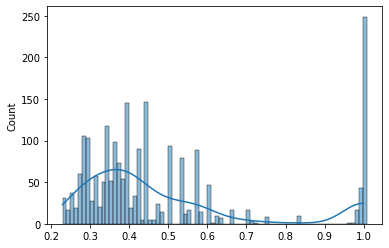

In [323]:
import seaborn as sns
fig, ax = plt.subplots()
sns.histplot(pct_identities,kde=True,binwidth=0.01,ax=ax)

In [344]:
outfile = "./mutation_list.txt"

with open(outfile,"w") as f:
    f.write("[PROTEIN]:[AA1][LOCATION][AA2]\n")
    for i,row in protein_df.iterrows():
        for mutation in row.mutations:
            f.write(f"{row.shorthand.strip()}:{mutation}\n")

In [345]:
print(open(outfile).read())

[PROTEIN]:[AA1][LOCATION][AA2]
surface glycoprotein:N835K
surface glycoprotein:P787Q
surface glycoprotein:I721S
surface glycoprotein:S204Y
surface glycoprotein:W488C
surface glycoprotein:K509R
surface glycoprotein:G903A
surface glycoprotein:X1136T
surface glycoprotein:Y544N
surface glycoprotein:l948L
surface glycoprotein:G391C
surface glycoprotein:n950D
surface glycoprotein:K394N
surface glycoprotein:H211N
surface glycoprotein:K1019R
surface glycoprotein:K540N
surface glycoprotein:G826V
surface glycoprotein:G614D
surface glycoprotein:G689S
surface glycoprotein:N820D
surface glycoprotein:R821L
surface glycoprotein:R152W
surface glycoprotein:F555S
surface glycoprotein:F794I
surface glycoprotein:A708S
surface glycoprotein:A696T
surface glycoprotein:L826V
surface glycoprotein:K709N
surface glycoprotein:D695Y
surface glycoprotein:V794I
surface glycoprotein:c1254C
surface glycoprotein:Q1144E
surface glycoprotein:A791T
surface glycoprotein:s1242S
surface glycoprotein:c1253C
surface glycoprote